## Working with barcelona dataset

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.style.use("seaborn")

In [44]:
from matplotlib import style
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


### Importing accidents_2017.csv file

In [45]:
df = pd.read_csv("datasets/Barcelona Datasets/accidents_2017.csv")
df

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
0,2017S008429,Unknown,Unknown,Número 27 ...,Friday,October,13,8,Morning,2,0,2,2,2.125624,41.340045
1,2017S007316,Unknown,Unknown,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,Morning,2,0,2,2,2.120452,41.339426
2,2017S010210,Unknown,Unknown,Litoral (Besòs) ...,Friday,December,8,21,Afternoon,5,0,5,2,2.167356,41.360886
3,2017S006364,Unknown,Unknown,Número 3 Zona Franca ...,Friday,July,21,2,Night,1,0,1,2,2.124529,41.337668
4,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,May,25,14,Afternoon,1,0,1,3,2.185272,41.416365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10334,2017S003667,Sant Andreu,el Bon Pastor,Litoral (Llobregat) ...,Tuesday,April,25,8,Morning,1,0,1,3,2.201800,41.392004
10335,2017S001896,Sant Andreu,el Bon Pastor,PL MONTERREY ...,Wednesday,March,8,12,Morning,1,0,1,2,2.206013,41.443445
10336,2017S010718,Sant Andreu,el Bon Pastor,Litoral (Llobregat) ...,Thursday,December,28,8,Morning,1,0,1,2,2.205607,41.443894
10337,2017S006145,Sant Andreu,el Bon Pastor,Litoral (Besòs) ...,Friday,July,14,14,Afternoon,1,0,1,2,2.205118,41.444824


### Creating a table with District Name as index, Mild injuries and Serious injuries as the columns 

In [46]:
table = pd.pivot_table(data= df, index= "District Name", values= ["Mild injuries","Serious injuries"], aggfunc= np.sum)
table

,Mild injuries,Serious injuries
District Name,,
Ciutat Vella,623,11
Eixample,3499,60
Gràcia,576,12
Horta-Guinardó,827,10
Les Corts,865,27
Nou Barris,647,13
Sant Andreu,693,11
Sant Martí,1593,51
Sants-Montjuïc,1305,21


### Ploting two bar graphs
##### - With respect to District and Mild Injuries
##### - And with respect to District and Serious Injuries

Text(0.5, 1.0, 'Number of mild Injuries happend during accidents in barcelona')

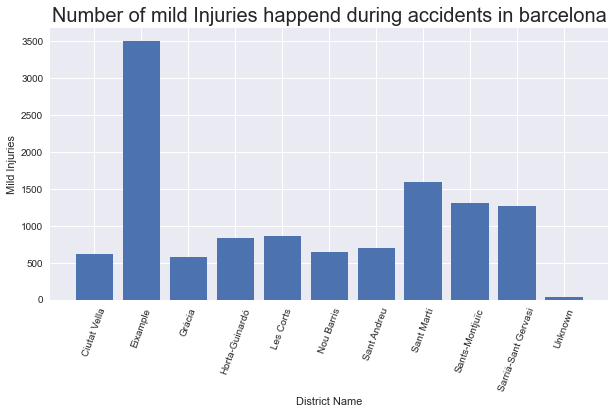

In [47]:
plt.figure(figsize=(10, 5))
plt.bar(table.index,table["Mild injuries"] )
plt.xticks(rotation =70)
plt.xlabel("District Name")
plt.ylabel("Mild Injuries")
plt.title("Number of mild Injuries happend during accidents in barcelona",fontdict={'fontsize': 20,'fontweight' : 5})

Text(0.5, 1.0, 'Number of serious Injuries happend during accidents in barcelona')

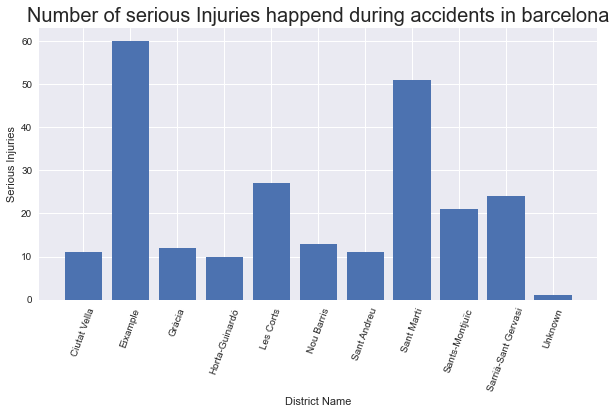

In [48]:
plt.figure(figsize=(10, 5))
plt.bar(table.index,table["Serious injuries"] )
plt.xticks(rotation =70)
plt.xlabel("District Name")
plt.ylabel("Serious Injuries")
plt.title("Number of serious Injuries happend during accidents in barcelona",fontdict={'fontsize': 20,'fontweight' : 5})

#### We conclude that Eixample had the higest number of accidents on the year 2017 with 3499 Mild injuries and 60 Serious injuries

### Ploting a Pie Chart

##### Takeing the total number of accidents happend during Afternoon, Morning and Night

In [49]:
df_day = df.groupby('Part of the day')['Id'].nunique()
df_day

Part of the day
Afternoon    5080
Morning      4065
Night        1190
Name: Id, dtype: int64

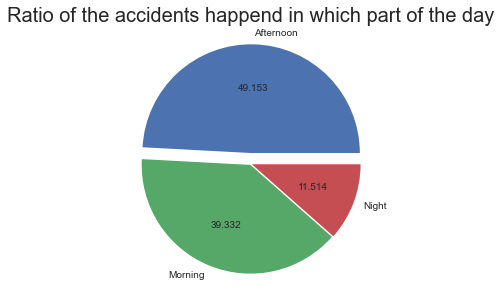

In [50]:
plt.figure(figsize=(10, 5))
plt.pie(df_day, labels =[x for x in pod.keys()],autopct='%0.3f', explode=[0.1,0.01,0.01])
plt.title("Ratio of the accidents happend in which part of the day",fontdict={'fontsize': 20,'fontweight' : 5})
plt.show()

##### We conclude that Most of the accidents happend during Afternoon

##### Visualing in which months the accidents were more using a pie chart

In [51]:
Month = df.groupby('Month')['Id'].nunique()
Month

Month
April        843
August       652
December     762
February     824
January      844
July         918
June         908
March        935
May          962
November     991
October      927
September    769
Name: Id, dtype: int64

Text(0.5, 1.0, 'Ratio of the accidents over the months')

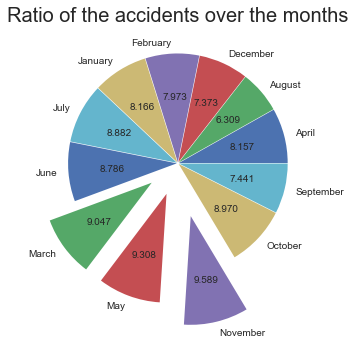

In [52]:
plt.figure(figsize=(10, 5))
plt.pie(Month, labels =[i for i in Month.keys()],autopct='%0.3f', explode =[0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.3,0.3,0.5,0.01,0.01])
plt.title("Ratio of the accidents over the months",fontdict={'fontsize': 20,'fontweight' : 5})

##### We conclude that Most accidents happend during the month of November, followed by May and then March